# Sleeping in Seattle: Predicting AirBnb Ratings

## Load relevant data, clean it, and begin exploring

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
# Load data
calendar_data = pd.read_csv('calendar.csv', header=0)
listings_data = pd.read_csv('listings.csv', header=0)
reviews_data = pd.read_csv('reviews.csv', header=0)

In [5]:
# Let's see what these contain
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [9]:
calendar_data.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


- Calendar_Data
    - Potential predictors: future room avalability / price

In [7]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [8]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


- Listings Data
    - potential predictors: a lot
    - potential outcome variables: review_scores_rating; other ratings scores

In [10]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [11]:
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


- Reviews Data
    - review-specific, exclude from 'predictive' model

## Focus on Listing_Data

- Cleaning time
     - trim the dataset down from 92 fields into ones that are going to be the most valuable
     - Descriptions
         - name, summary, space, description
     - Host
         - host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost
     - Home Details
         - property_type, room_type, accomodates, bathrooms, bedrooms, beds, bed_type, amenities
     - Listing Elements
         - price, cleaning_fee, extra_people, minimum_nights, maximum_nights, instant_bookable, cancellation_policy
     - Outcome Variables
         - review_scores_rating, review_score_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value

In [12]:
ld = listings_data.loc[:, ['name', 'summary', 'space', 'description', 
    'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
    'neighbourhood_group_cleansed', 'property_type', 'room_type', 
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
    'amenities', 'price', 'cleaning_fee', 'minimum_nights',
    'maximum_nights', 'instant_bookable',
    'cancellation_policy', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value']]

In [13]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 30 columns):
name                            3818 non-null object
summary                         3641 non-null object
space                           3249 non-null object
description                     3818 non-null object
host_response_time              3295 non-null object
host_response_rate              3295 non-null object
host_acceptance_rate            3045 non-null object
host_is_superhost               3816 non-null object
neighbourhood_group_cleansed    3818 non-null object
property_type                   3817 non-null object
room_type                       3818 non-null object
accommodates                    3818 non-null int64
bathrooms                       3802 non-null float64
bedrooms                        3812 non-null float64
beds                            3817 non-null float64
bed_type                        3818 non-null object
amenities                       3818 non-nu

In [19]:
# Get lengths of Descriptive Elements
ld['name_length'] = ld['name'].str.len()
ld['summary_length'] = ld['summary'].str.len()
ld['space_length'] = ld['space'].str.len()
ld['description_length'] = ld['description'].str.len()
ld['amenities_length'] = ld['amenities'].str.len()

In [20]:
ld['name_length'].fillna(0, inplace=True)
ld['summary_length'].fillna(0, inplace=True)
ld['space_length'].fillna(0, inplace=True)
ld['description_length'].fillna(0, inplace=True)
ld['amenities_length'].fillna(0, inplace=True)

In [22]:
ld = ld.drop(['name', 'summary', 'space', 'description', 'amenities'], axis=1)

In [23]:
# Recode host_response_time to integers as it is a spectrum
ld['host_response_time'].replace('within an hour', 1, inplace=True)
ld['host_response_time'].replace('within a few hours', 2, inplace=True)
ld['host_response_time'].replace('within a day', 3, inplace=True)
ld['host_response_time'].replace('a few days or more', 4, inplace=True)

# Impute missing values using forward-fill method
ld['host_response_time'].fillna(method='ffill', inplace=True)

In [24]:
# Convert acceptance / response percentages to numbers
ld['host_acceptance_rate'] = ld['host_acceptance_rate'].replace('%', '', regex=True).astype('float64')/100
ld['host_response_rate'] = ld['host_response_rate'].replace('%', '', regex=True).astype('float64')/100

In [25]:
# Impute missing values using forward-fill method
ld['host_acceptance_rate'].fillna(method='ffill', inplace=True)
ld['host_response_rate'].fillna(method='ffill', inplace=True)

In [26]:
# Change f/t values to binary 0/1
ld['host_is_superhost'].replace('t', 1, inplace=True)
ld['host_is_superhost'].replace('f', 0, inplace=True)
ld['instant_bookable'].replace('t', 1, inplace=True)
ld['instant_bookable'].replace('f', 0, inplace=True)

In [27]:
ld['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [28]:
# Clean property_type category to 5 categories
def recode(value):
    if value not in ['House', 'Apartment', 'Townhouse', 'Condominium']:
        return 'Other'
    return value

ld['property_type'] = ld['property_type'].apply(recode)

In [29]:
ld['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [31]:
# Clean bed_type to binary real bed or other
def recode(value):
    if value != 'Real Bed':
        return 'Other'
    return value

ld['bed_type'] = ld['bed_type'].apply(recode)

In [32]:
# Convert cleaning fee and price from strings to number
ld['price'] = ld['price'].str.replace('$', '')
ld['price'] = ld['price'].str.replace(',', '').astype('float64')

ld['cleaning_fee'] = ld['cleaning_fee'].str.replace('$', '')
ld['cleaning_fee'] = ld['cleaning_fee'].str.replace(',', '').astype('float64')

In [33]:
# Missing data for cleaning fee indicates $0 cleaning fee
ld['cleaning_fee'].fillna(0, inplace=True)

# Can't be sure what a missing value for these so we'll fill na
ld['bathrooms'].fillna(method='ffill', inplace=True)
ld['bedrooms'].fillna(method='ffill', inplace=True)
ld['beds'].fillna(method='ffill', inplace=True)
ld['host_is_superhost'].fillna(method='ffill', inplace=True)

In [34]:
# Get rid of all records that don't have our outcome variable
ld = ld[ld['review_scores_rating'].isnull() == 0]

In [35]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 30 columns):
host_response_time              3171 non-null float64
host_response_rate              3171 non-null float64
host_acceptance_rate            3171 non-null float64
host_is_superhost               3171 non-null float64
neighbourhood_group_cleansed    3171 non-null object
property_type                   3171 non-null object
room_type                       3171 non-null object
accommodates                    3171 non-null int64
bathrooms                       3171 non-null float64
bedrooms                        3171 non-null float64
beds                            3171 non-null float64
bed_type                        3171 non-null object
price                           3171 non-null float64
cleaning_fee                    3171 non-null float64
minimum_nights                  3171 non-null int64
maximum_nights                  3171 non-null int64
instant_bookable                3171 no

### Look at some distributions

In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numdf = ld.select_dtypes(include=numerics)
numdf = numdf.dropna(axis=0, how='any')
numdf_variables = list(numdf)

In [44]:
numdf_variables

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'cleaning_fee',
 'minimum_nights',
 'maximum_nights',
 'instant_bookable',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'name_length',
 'summary_length',
 'space_length',
 'amenities_length',
 'description_length']

In [45]:
numdf

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,name_length,summary_length,space_length,amenities_length,description_length
0,2.0,0.96,1.0,0.0,4,1.0,1.0,1.0,85.0,0.0,...,10.0,10.0,10.0,9.0,10.0,28,0.0,1000.0,114,1000
1,1.0,0.98,1.0,1.0,4,1.0,1.0,1.0,150.0,40.0,...,10.0,10.0,10.0,10.0,10.0,34,249.0,1000.0,243,1000
2,2.0,0.67,1.0,0.0,11,4.5,5.0,7.0,975.0,300.0,...,10.0,10.0,10.0,10.0,10.0,35,241.0,1000.0,291,1000
4,1.0,1.00,1.0,0.0,6,2.0,3.0,3.0,450.0,125.0,...,9.0,10.0,10.0,9.0,9.0,30,184.0,488.0,181,1000
5,1.0,1.00,1.0,0.0,2,1.0,1.0,1.0,120.0,40.0,...,10.0,10.0,10.0,10.0,10.0,31,245.0,432.0,92,1000
6,1.0,1.00,1.0,1.0,2,1.0,1.0,1.0,80.0,0.0,...,10.0,10.0,10.0,10.0,10.0,31,248.0,1000.0,108,1000
7,1.0,1.00,1.0,1.0,2,1.0,1.0,1.0,60.0,25.0,...,10.0,10.0,10.0,9.0,10.0,33,220.0,850.0,106,1000
8,1.0,1.00,1.0,0.0,2,1.0,1.0,1.0,90.0,0.0,...,9.0,10.0,9.0,10.0,10.0,32,190.0,123.0,174,1000
9,1.0,0.98,1.0,1.0,4,1.0,1.0,1.0,150.0,40.0,...,10.0,10.0,10.0,10.0,9.0,34,216.0,1000.0,243,1000
10,2.0,1.00,1.0,1.0,2,1.0,1.0,1.0,95.0,15.0,...,10.0,10.0,10.0,10.0,10.0,35,239.0,1000.0,286,1000


In [37]:
# Set the number of graphs in the facet chart
graphs = len(numdf_variables) - 1

In [42]:
# create a list of positions for the chart
position = []

for i in range(8):
    for j in range(3):
        b = i, j
        position.append(b)

/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


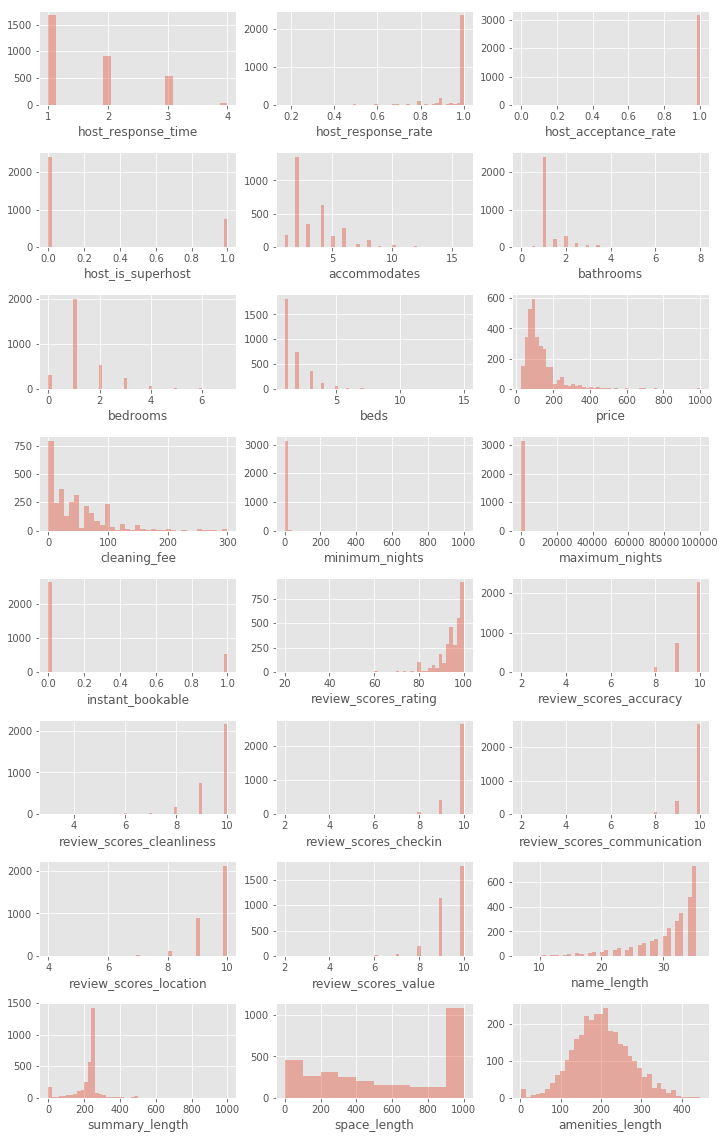

In [43]:
# Create base of subplot chart.  rows * cols = graphs
fig, axes = plt.subplots(nrows=8, ncols=3, sharey=False, sharex=False, figsize=(12, 20))
fig.subplots_adjust(hspace = .5)

# Fill in base with graphs based off of position
for i in range(graphs):
    sns.distplot(numdf[numdf_variables[i]], ax=axes[position[i]], kde=False)

In [48]:
# Correlation Matrix
corr = ld.corr()
corr = (corr)

In [49]:
corr

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,name_length,summary_length,space_length,amenities_length,description_length
host_response_time,1.000000,-0.507562,-0.029928,-0.155169,0.053870,0.028025,0.080800,0.028820,0.090766,0.055648,...,-0.109392,-0.064917,-0.081838,-0.052179,-0.099000,-0.012073,-0.047708,-0.087380,-0.139248,-0.089874
host_response_rate,-0.507562,1.000000,-0.007472,0.140153,-0.015163,0.001385,-0.015477,-0.004406,-0.037678,-0.037243,...,0.150549,0.130525,0.135365,0.059843,0.132624,-0.004421,0.024339,0.078317,0.104400,0.103781
host_acceptance_rate,-0.029928,-0.007472,1.000000,0.009894,0.012349,0.007731,0.006157,0.011418,0.006277,0.009444,...,-0.009893,-0.006374,-0.005956,-0.011058,0.010723,-0.001183,0.001798,0.018098,0.016306,0.015458
host_is_superhost,-0.155169,0.140153,0.009894,1.000000,-0.026338,-0.018085,-0.041232,-0.040794,0.005096,-0.015870,...,0.230263,0.166301,0.162025,0.126054,0.221285,0.019301,0.055425,0.079383,0.094963,0.097616
accommodates,0.053870,-0.015163,0.012349,-0.026338,1.000000,0.526793,0.770186,0.861727,0.648382,0.640941,...,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,0.059138,-0.024635,0.197097,0.261690,0.072504
bathrooms,0.028025,0.001385,0.007731,-0.018085,0.526793,1.000000,0.604431,0.527210,0.509525,0.446521,...,0.017079,-0.003699,-0.016998,-0.008709,0.014402,0.020966,-0.009460,0.097337,0.126691,-0.002221
bedrooms,0.080800,-0.015477,0.006157,-0.041232,0.770186,0.604431,1.000000,0.752361,0.627782,0.575839,...,-0.006658,0.010652,0.001255,-0.028692,-0.000121,0.048483,-0.035641,0.130691,0.167478,0.020718
beds,0.028820,-0.004406,0.011418,-0.040794,0.861727,0.527210,0.752361,1.000000,0.584570,0.599922,...,0.004732,-0.021963,-0.013373,-0.023734,-0.029102,0.054944,-0.022862,0.166958,0.217289,0.048267
price,0.090766,-0.037678,0.006277,0.005096,0.648382,0.509525,0.627782,0.584570,1.000000,0.590014,...,0.054357,0.007877,0.012990,0.075069,-0.041776,0.013540,-0.036936,0.082194,0.170608,-0.020964
cleaning_fee,0.055648,-0.037243,0.009444,-0.015870,0.640941,0.446521,0.575839,0.599922,0.590014,1.000000,...,0.067419,-0.066371,-0.063094,0.009533,-0.090879,0.050842,-0.070059,0.237003,0.211875,0.072172


review_scores_rating           1.000000
review_scores_value            0.696534
review_scores_cleanliness      0.642882
review_scores_accuracy         0.621257
review_scores_communication    0.540620
review_scores_checkin          0.521813
review_scores_location         0.368423
host_is_superhost              0.240895
amenities_length               0.156362
host_response_rate             0.130394
summary_length                 0.065434
price                          0.055551
description_length             0.048678
bathrooms                      0.044645
bedrooms                       0.024235
instant_bookable               0.006071
minimum_nights                 0.001392
beds                          -0.000720
cleaning_fee                  -0.004638
name_length                   -0.007339
accommodates                  -0.013101
host_acceptance_rate          -0.014684
space_length                  -0.021034
maximum_nights                -0.031313
host_response_time            -0.097097


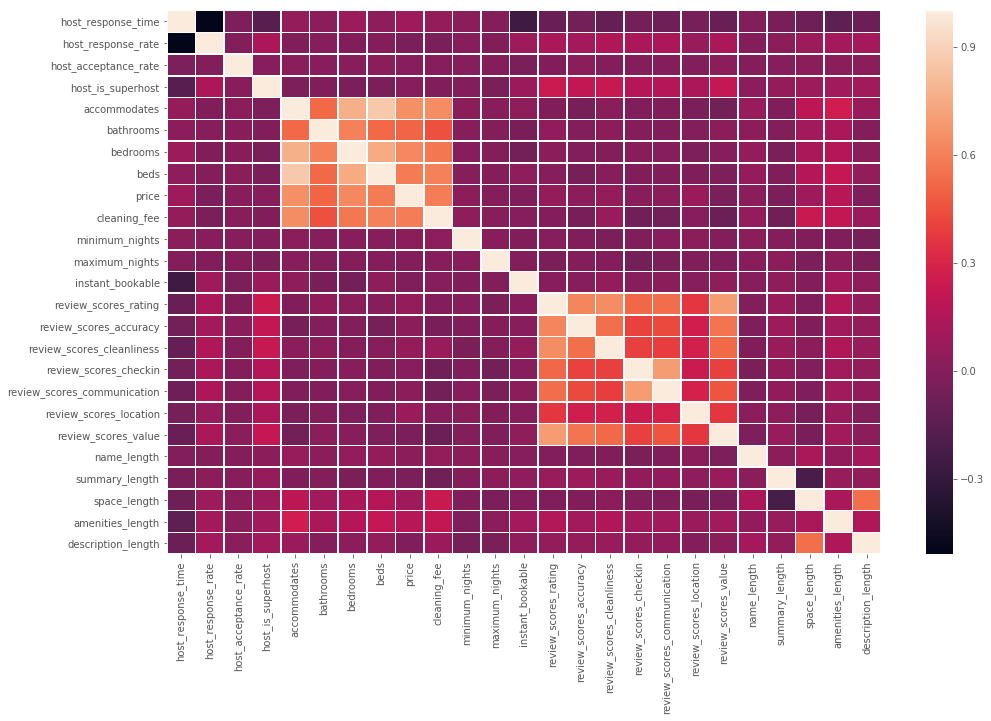

In [50]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(corr,
                   xticklabels=corr.columns.values,
                   yticklabels=corr.columns.values,
                   linewidths = .5,
                   ax=ax)

corr['review_scores_rating'].sort_values(ascending=False)

- Obviously the ratings subscore tend to correlate with the overall rating, but beyond that, the biggest correlates so far with review_score_rating appear to be:
    - host_is_superhost
    - amenities_length
    - host_response_rate
- Other stuff:
    - Location ratings doesn't really seem to factor the overall rating
    - Price / Cleaning fee look like they are greatly influenced by the amount of elements (beds, guests, etc.)

In [51]:
# Remove ALL Ratings but review_scores_rating

model_data = ld[['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'price',
 'cleaning_fee',
 'minimum_nights',
 'maximum_nights',
 'instant_bookable',
 'cancellation_policy',
 'review_scores_rating',
 'name_length',
 'summary_length',
 'space_length',
 'description_length',
 'amenities_length']]

In [52]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 24 columns):
host_response_time              3171 non-null float64
host_response_rate              3171 non-null float64
host_acceptance_rate            3171 non-null float64
host_is_superhost               3171 non-null float64
neighbourhood_group_cleansed    3171 non-null object
property_type                   3171 non-null object
room_type                       3171 non-null object
accommodates                    3171 non-null int64
bathrooms                       3171 non-null float64
bedrooms                        3171 non-null float64
beds                            3171 non-null float64
bed_type                        3171 non-null object
price                           3171 non-null float64
cleaning_fee                    3171 non-null float64
minimum_nights                  3171 non-null int64
maximum_nights                  3171 non-null int64
instant_bookable                3171 no

In [53]:
# Get dummy variables for our 5 categorical fields
model_data = pd.get_dummies(model_data, columns=['neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'])

In [54]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 49 columns):
host_response_time                                  3171 non-null float64
host_response_rate                                  3171 non-null float64
host_acceptance_rate                                3171 non-null float64
host_is_superhost                                   3171 non-null float64
accommodates                                        3171 non-null int64
bathrooms                                           3171 non-null float64
bedrooms                                            3171 non-null float64
beds                                                3171 non-null float64
price                                               3171 non-null float64
cleaning_fee                                        3171 non-null float64
minimum_nights                                      3171 non-null int64
maximum_nights                                      3171 non-null int64
instant_boo

## Modeling

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Create Training / Test splits
target_name = 'review_scores_rating'

X = model_data.drop([target_name], axis=1)
y = model_data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=243)

#### OLS Regression

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
# Basic OLS Regression (PUT ALL IN)
Xr = X_train
yr = y_train

Xr = sm.add_constant(Xr)                 # let's add an intercept(beta_0) to our model
ols_model = sm.OLS(yr, Xr).fit()         # sm.OLS(output, input)

# Print out statistics
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.143
Model:                              OLS   Adj. R-squared:                  0.129
Method:                   Least Squares   F-statistic:                     10.27
Date:                  Sun, 10 Feb 2019   Prob (F-statistic):           1.04e-61
Time:                          11:03:15   Log-Likelihood:                -8722.1
No. Observations:                  2695   AIC:                         1.753e+04
Df Residuals:                      2651   BIC:                         1.779e+04
Df Model:                            43                                         
Covariance Type:              nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               38.3050      2.697     14.204      0.000      33.017      43.593
host_response_time                                  -0.0662      0.186     -0.356      0.722      -0.432       0.299
host_response_rate                                   5.1160      1.265      4.045      0.000       2.636       7.596
host_acceptance_rate                                -7.4354      6.294     -1.181      0.238     -19.778       4.907
host_is_superhost                                    3.1983      0.293     10.904      0.000       2.623       3.773
accommodates                                        -0.4274      0.146     -2.933      0.003      -0.713      -0.142
bathrooms                                            0.1436      0.277      0.519      0.604      -0.399       0.686
bedrooms                                             0.1415      0.267      0.531      0.596      -0.381       0.664
beds                                                 0.1207      0.218      0.554      0.580      -0.306       0.548
price                                                0.0064      0.002      3.189      0.001       0.002       0.010
cleaning_fee                                         0.0017      0.004      0.482      0.630      -0.005       0.009
minimum_nights                                       0.0023      0.006      0.372      0.710      -0.010       0.015
maximum_nights                                   -6.732e-05   6.07e-05     -1.109      0.268      -0.000    5.17e-05
instant_bookable                                    -0.4043      0.340     -1.189      0.235      -1.071       0.263
name_length                                         -0.0077      0.025     -0.311      0.756      -0.056       0.041
summary_length                                       0.0023      0.002      1.475      0.140      -0.001       0.005
space_length                                        -0.0008      0.000     -1.806      0.071      -0.002    6.58e-05
description_length                                   0.0014      0.001      2.026      0.043    4.47e-05       0.003
amenities_length                                     0.0129      0.002      6.639      0.000       0.009       0.017
neighbourhood_group_cleansed_Ballard                 3.4745      0.528      6.574      0.000       2.438       4.511
neighbourhood_group_cleansed_Beacon Hill             2.2913      0.704      3.253      0.001       0.910       3.672
neighbourhood_group_cleansed_Capitol Hill            2.7002      0.411      6.571      0.000       1.894       3.506
neighbourhood_group_cleansed_Cascade                 1.0349      0.852      1.214      0.225      -0.636       2.706
neighbourhood_group

In [60]:
# Basic OLS Regression from sklearn
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
# The features that have the most weight?
ols_coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})

ols_coefficients.sort_values('importance', ascending=False)[:10]

,feature,importance
1,host_response_rate,5.115973
3,host_is_superhost,3.198290
22,neighbourhood_group_cleansed_Central Area,1.633836
30,neighbourhood_group_cleansed_Queen Anne,1.514062
23,neighbourhood_group_cleansed_Delridge,1.500923
18,neighbourhood_group_cleansed_Ballard,1.221299
34,neighbourhood_group_cleansed_West Seattle,1.058021
39,property_type_Townhouse,0.941432
32,neighbourhood_group_cleansed_Seward Park,0.793020
45,cancellation_policy_flexible,0.545167


In [63]:
# Get OLS MSE on test dataset
from sklearn.metrics import mean_squared_error

ols_y_pred = lm.predict(X_test)
ols_mse = np.sqrt(mean_squared_error(y_test, ols_y_pred))
ols_mse

6.175361616300061

#### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
# Classification
dtree = DecisionTreeRegressor(min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train, y_train)

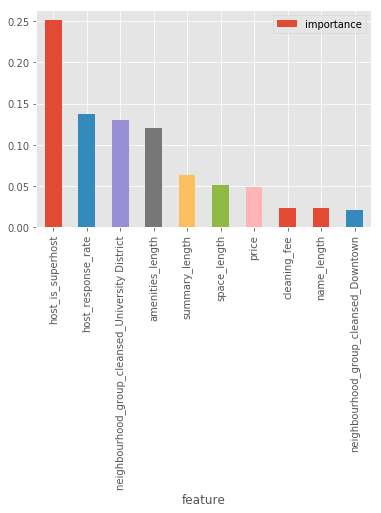

In [78]:
importances = dtree.feature_importances_
feat_names = X_train.columns

tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance', ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [79]:
# Get Decision Tree MSE on test dataset
dtree_y_pred = dtree.predict(X_test)

dtree_mse = np.sqrt(mean_squared_error(y_test, dtree_y_pred))
dtree_mse

6.522280252306017

#### Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


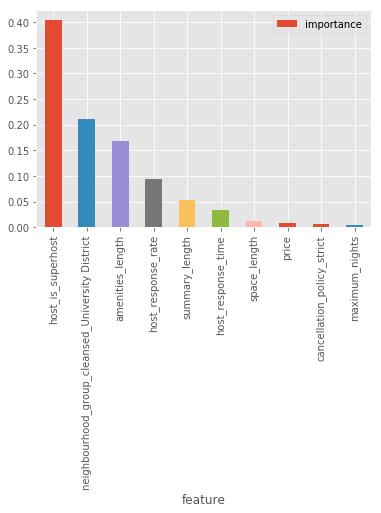

In [70]:
rf = RandomForestRegressor(max_depth=3, random_state=0)

rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result.sort_values(by='importance', ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [71]:
# Get Random Forest MSE on test dataset
rf_y_pred = rf.predict(X_test)
rf_mse = np.sqrt(mean_squared_error(y_test, rf_y_pred))

rf_mse

6.199733431104739

In [73]:
# What if we just use the test median/mean
mean_array = [y_train.mean()] * len(X_test)
mean_mse = np.sqrt(mean_squared_error(y_test, mean_array))

median_array = [y_train.median()] * len(X_test)
median_mse = np.sqrt(mean_squared_error(y_test, median_array))

In [80]:
print('Random Forest MSE:', rf_mse)
print('Decision Tree MSE:', dtree_mse)
print('OLS MSE:', ols_mse)
print('Median MSE:', median_mse)
print('Mean MSE:', mean_mse)

Random Forest MSE: 6.199733431104739
Decision Tree MSE: 6.522280252306017
OLS MSE: 6.175361616300061
Median MSE: 6.469222544953485
Mean MSE: 6.34807915843357


#### Conclusion

- OLS wins?
    - for now, barely. It's almost equal to just guessing the mean value every time
- To optimize your rating, be a superhost and offer more amenities

- Can we get better RF results if we restrict feature selection?

#### Restrict RF model to top 10 predictors

In [82]:
rf_10_features = rf_result.sort_values(by='importance', ascending=False)['feature'][:10].tolist()

In [83]:
rf_10_features

['host_is_superhost',
 'neighbourhood_group_cleansed_University District',
 'amenities_length',
 'host_response_rate',
 'summary_length',
 'host_response_time',
 'space_length',
 'price',
 'cancellation_policy_strict',
 'maximum_nights']

In [85]:
rf_10_model = rf.fit(X_train[rf_10_features], y_train)
rf_10_pred = rf.predict(X_test[rf_10_features])
rf_10_mse = np.sqrt(mean_squared_error(y_test, rf_10_pred))
print(rf_mse)
print(rf_10_mse, 'Not much better')

6.199733431104739
6.199844859405727 Not much better


#### Recursive Feature Elimination

In [92]:
# Document:
    # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
'''
   Feature ranking with recursive feature elimination.
   Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 
   First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. 
   Then, the least important features are pruned from current set of features. 
   That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
'''

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression()

In [89]:
# create the RFE model and select 3 attributes
rfe = RFE(lr, 10)
rfe = rfe.fit(X_train, y_train)

/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/best_zld/anaconda/envs/

/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/best_zld/anaconda/envs/

/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/best_zld/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/best_zld/anaconda/envs/

In [96]:
# Summarize the Selection of the Attributes
rfe_result = pd.DataFrame({'feature': feat_names, 'ranking': rfe.ranking_, 'selection': rfe.support_})
rfe_result.sort_values(by='ranking', ascending=True)[:10]

,feature,ranking,selection
1,host_response_rate,1,True
2,host_acceptance_rate,1,True
3,host_is_superhost,1,True
5,bathrooms,1,True
7,beds,1,True
45,cancellation_policy_flexible,1,True
44,bed_type_Real Bed,1,True
10,minimum_nights,1,True
33,neighbourhood_group_cleansed_University District,1,True
41,room_type_Private room,1,True


In [98]:
# Does our RF model like these 10 predictors better?
rf_10_features = rfe_result.sort_values(by='ranking')['feature'][:10].tolist()

rf_10_model = rf.fit(X_train[rf_10_features], y_train)
rf_10_features_pred = rf.predict(X_test[rf_10_features])
rf_10_features_mse = np.sqrt(mean_squared_error(y_test, rf_10_features_pred))

print('RF MSE:', rf_mse)
print('RF with top 10 features MSE:', rf_10_mse)
print('RF with 10 features MSE:', rf_10_features_mse)
print('Not really')

RF MSE: 6.199733431104739
RF with top 10 features MSE: 6.199844859405727
RF with 10 features MSE: 6.27912057078373
Not really


#### RFE with Linear Regression

In [99]:
model = LinearRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe_result = pd.DataFrame({'feature': feat_names, 'ranking': rfe.ranking_, 'selection': rfe.support_})
rfe_result.sort_values(by='ranking')[:10]

,feature,ranking,selection
23,neighbourhood_group_cleansed_Delridge,1,True
1,host_response_rate,1,True
2,host_acceptance_rate,1,True
3,host_is_superhost,1,True
39,property_type_Townhouse,1,True
36,property_type_Condominium,1,True
33,neighbourhood_group_cleansed_University District,1,True
30,neighbourhood_group_cleansed_Queen Anne,1,True
25,neighbourhood_group_cleansed_Interbay,1,True
21,neighbourhood_group_cleansed_Cascade,1,True


In [101]:
# Does our RF model like these 10 predictors better?
rf_10_features = rfe_result.sort_values(by='ranking')['feature'][:10].tolist()

rf_10_model = rf.fit(X_train[rf_10_features], y_train)
rf_10_features_pred = rf.predict(X_test[rf_10_features])
rf_10_features_mse = np.sqrt(mean_squared_error(y_test, rf_10_features_pred))

print('RF MSE:', rf_mse)
print('RF with top 10 features MSE:', rf_10_mse)
print('RF with 10 features MSE:', rf_10_features_mse)
print('Not really')

RF MSE: 6.199733431104739
RF with top 10 features MSE: 6.199844859405727
RF with 10 features MSE: 6.28503784690052
Not really
